In [2]:
# Text Classifiation using NLP

# Importing the libraries
import numpy as np
import pandas as pd
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pandas_profiling

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


nltk.download('stopwords')

##Package for regular expressions 
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZomAdmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_excel('C:/Users/ZomAdmin/Desktop/Data Science with python/Python Session 28/MAIN CASE STUDIES - ML/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [8]:
data.shape

(505, 4)

In [4]:
pandas_profiling_data = pandas_profiling.ProfileReport(data)
pandas_profiling_data.to_file('pandas_profiling_data.html')

In [11]:
main_data = data[['Stars','Reviews']] ## Here we are taking only those columns which are important for our analysis:

In [12]:
main_data

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...
...,...,...
500,1,\r\nI never write reviews but had to this time...
501,1,\r\nIt all started when Bob G ran a credit che...
502,1,\r\nWhat a horrible experience. We have excell...
503,1,"\r\nRep was extremely professional, friendly, ..."


## Defining X and Y variables

In [150]:
X, y = main_data.Reviews, main_data.Stars

In [151]:
X.head(5) ## Here we have all the reviews 

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [152]:
y.head(5) ## Here we have target variable

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [153]:
X

0      Great job, Wyndham Capital! Each person was pr...
1      Matthew Richardson is professional and helpful...
2      We had a past experience with Wyndham Mortgage...
3      We have been dealing with Brad Thomka from the...
4      I can't express how grateful I am for the supp...
                             ...                        
500    \r\nI never write reviews but had to this time...
501    \r\nIt all started when Bob G ran a credit che...
502    \r\nWhat a horrible experience. We have excell...
503    \r\nRep was extremely professional, friendly, ...
504    \r\nI was working with a loan consultant from ...
Name: Reviews, Length: 505, dtype: object

In [154]:
type(X)

pandas.core.series.Series

In [158]:
X

0      Great job, Wyndham Capital! Each person was pr...
1      Matthew Richardson is professional and helpful...
2      We had a past experience with Wyndham Mortgage...
3      We have been dealing with Brad Thomka from the...
4      I can't express how grateful I am for the supp...
                             ...                        
500    \r\nI never write reviews but had to this time...
501    \r\nIt all started when Bob G ran a credit che...
502    \r\nWhat a horrible experience. We have excell...
503    \r\nRep was extremely professional, friendly, ...
504    \r\nI was working with a loan consultant from ...
Name: Reviews, Length: 505, dtype: object

### Here we are removing noise from the data using regular expressions

In [22]:
# Creating the corpus
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i])) ## This matches any character which is not unicode word character
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'[^a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

In [23]:
corpus ## Here by using regular expressions we have removed all the backward slashes, numerics,

['great jobwyndham capitaleach person was professional and helped us move through our refinance process smoothlythank you ',
 'matthew richardson is professional and helpfulhe helped us find the correct product for our mortgagethank you very much for the excellent servicematthew ',
 'we had past experience with wyndham mortgage and would without question use again and again if neededwyndham went beyond the extra mile to not only right wrong encountered from the servicer we were dealing on our previous loanbut they pulled together and found viable option for us that ultimately saved us moneywe would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needssincerest thanks wyndhamedlind',
 'we have been dealing with brad thomka from the beginning of what started out to be very stressful time for usbut with the help from brad and the entire wyndham mortgage team it was turned into happy endingbrad and wyndham went beyond the extra mile to not only right wr

### Here we are running combination sentence tokenizer and word_lemmatizer to correct the document gramatically

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   ## Here we have lemmatized all the words:

In [27]:
corpus

['great jobwyndham capitaleach person wa professional and helped u move through our refinance process smoothlythank you',
 'matthew richardson is professional and helpfulhe helped u find the correct product for our mortgagethank you very much for the excellent servicematthew',
 'we had past experience with wyndham mortgage and would without question use again and again if neededwyndham went beyond the extra mile to not only right wrong encountered from the servicer we were dealing on our previous loanbut they pulled together and found viable option for u that ultimately saved u moneywe would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needssincerest thanks wyndhamedlind',
 'we have been dealing with brad thomka from the beginning of what started out to be very stressful time for usbut with the help from brad and the entire wyndham mortgage team it wa turned into happy endingbrad and wyndham went beyond the extra mile to not only right wrong enco

In [35]:
len(corpus)

505

In [36]:
len(y)

505

### min_df = 3 means it will show only those words that are present in atleast three docs ,, why are doing this  = here we have bank reviews we might have some words which are not even present in 3 docs so we want to remoe those words

### max_df = means if any word is present in more than 70% docs we dont want those words as wellm

In [37]:
# Creating the Tf-Idf model directly ## We are also removing stop words from english language
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 505, min_df = 3, max_df = 0.7, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [40]:
vectorizer.get_feature_names() ## Feature names

['aaron',
 'able',
 'absolutely',
 'account',
 'across',
 'actual',
 'adam',
 'adan',
 'additional',
 'advice',
 'agent',
 'agreed',
 'alex',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'amount',
 'another',
 'answer',
 'answered',
 'answering',
 'anthony',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraiser',
 'appreciate',
 'appreciated',
 'approval',
 'around',
 'ask',
 'asked',
 'asking',
 'assurance',
 'attention',
 'attorney',
 'automatic',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'bank',
 'barrett',
 'beat',
 'became',
 'begin',
 'beginning',
 'believe',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'brad',
 'broker',
 'business',
 'buy',
 'buyer',
 'buying',
 'call',
 'called',
 'calling',
 'came',
 'capital',
 'card',
 'care',
 'causing',
 'certainly',
 'challenging',
 'check',
 'choice',
 'chose',
 'chris',
 'clear',
 'client',
 'close',
 'closed',
 'closing',
 'come',
 'comfortable',
 'co

In [38]:
X ## Here we have now tf-idf value for every variable

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.42609737, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
data=pd.DataFrame(X,columns = list(vectorizer.get_feature_names())) ## Giving TDF value of every word 

### Concatinating Y variable as well

In [44]:
final_data=pd.concat([data,y],axis=1)

In [45]:
final_data.head() ## Here we have our final data prepared now for further analysis

,aaron,able,absolutely,account,across,actual,adam,adan,additional,advice,...,wonderful,word,work,worked,working,would,wyndham,year,yet,Stars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.189153,0.426097,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.068566,0.463369,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.178359,0.000000,0.302295,0.0,0.0,5


### Train and Testing Split

In [54]:
features=final_data.columns.difference(['Stars'])

In [56]:
train_x,test_x,train_y,test_y = train_test_split(final_data[features],final_data.Stars,test_size = 0.3,random_state=1)

In [57]:
train_x.shape

(353, 505)

In [58]:
test_x.shape

(152, 505)

In [59]:
train_y.shape

(353,)

In [60]:
test_y.shape

(152,)

<center>
<h1>Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg=LogisticRegression()

In [64]:
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [67]:
train_predictions = pd.DataFrame({'actual':train_y,'predicted':logreg.predict(train_x)})

In [68]:
test_predictions = pd.DataFrame({'actual':test_y,'predicted':logreg.predict(test_x)})

In [71]:
test_predictions.head(3)

,actual,predicted
307,5,5
343,5,5
47,1,1


In [72]:
train_predictions.head(3)

,actual,predicted
13,5,5
61,5,5
376,5,5


In [75]:
#Evelution of train and test accuracy
from sklearn import metrics
train_accuracy=metrics.accuracy_score(train_predictions.actual,train_predictions.predicted)
print('train_accuracy: ',train_accuracy)

test_accuracy=metrics.accuracy_score(test_predictions.actual,test_predictions.predicted)
print('test_accuracy: ',test_accuracy)

train_accuracy:  0.8810198300283286
test_accuracy:  0.8486842105263158


In [81]:
# Creating a confusion matrix
cm = metrics.confusion_matrix(train_predictions.actual,train_predictions.predicted)

In [82]:
cm

array([[ 22,  42],
       [  0, 289]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

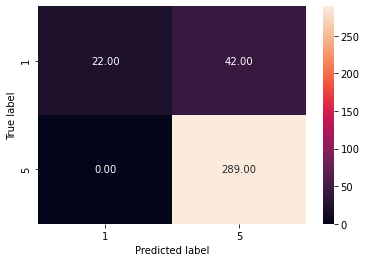

In [83]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [86]:
cm2=metrics.confusion_matrix(test_predictions.actual,test_predictions.predicted)

Text(0.5, 15.0, 'Predicted label')

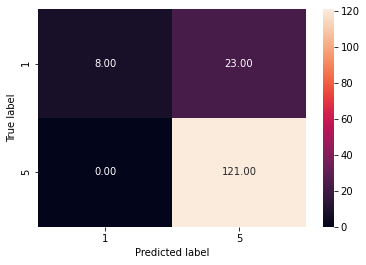

In [87]:
sns.heatmap(cm2, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

<center>
<h1>Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [96]:
nb_clf=GaussianNB()

In [98]:
nb_clf.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
train_predictions_naive_bayes = pd.DataFrame({'actual':train_y,'predicted':nb_clf.predict(train_x)})

In [100]:
test_predictions_naive_bayes = pd.DataFrame({'actual':test_y,'predicted':nb_clf.predict(test_x)})

In [102]:
test_predictions_naive_bayes.head(4)

,actual,predicted
307,5,5
343,5,5
47,1,1
67,5,5


In [101]:
train_predictions_naive_bayes.head(4)

,actual,predicted
13,5,5
61,5,5
376,5,5
39,1,1


In [107]:
print('train_accuracy',metrics.accuracy_score(train_predictions_naive_bayes.actual,train_predictions_naive_bayes.predicted))
print('test_accuracy',metrics.accuracy_score(test_predictions_naive_bayes.actual,test_predictions_naive_bayes.predicted))

train_accuracy 0.9065155807365439
test_accuracy 0.8881578947368421


In [108]:
cm3=metrics.confusion_matrix(train_predictions_naive_bayes.actual,train_predictions_naive_bayes.predicted)

Text(0.5, 15.0, 'Predicted label')

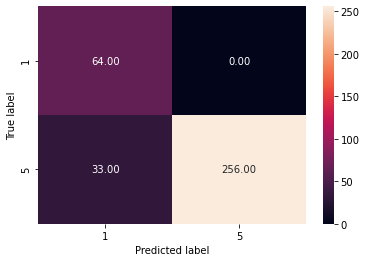

In [109]:
sns.heatmap(cm3, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

<center>
<h1>Boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [121]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [122]:
ada=AdaBoostClassifier()

In [123]:
gsc=GridSearchCV(ada,pargrid_ada,cv=4,verbose = True)

In [124]:
gsc.fit(train_x,train_y)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:557: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:557: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: Runtim

C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:557: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\

GridSearchCV(cv=4, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [125]:
gsc.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [126]:
ada2=AdaBoostClassifier(learning_rate=1,n_estimators=200)

In [128]:
ada2.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=200, random_state=None)

### Predictions

In [130]:
train_predictions_AdaBoosting = pd.DataFrame({'actual':train_y,'predicted':ada2.predict(train_x)})
test_predictions_AdaBoosting = pd.DataFrame({'actual':test_y,'predicted':ada2.predict(test_x)})

In [132]:
test_predictions_AdaBoosting.head(5)

,actual,predicted
307,5,5
343,5,5
47,1,1
67,5,5
361,5,5


In [131]:
train_predictions_AdaBoosting.head(5)

,actual,predicted
13,5,5
61,5,5
376,5,5
39,1,1
364,5,5


In [135]:
print('train_accuracy',metrics.accuracy_score(train_predictions_AdaBoosting.actual,train_predictions_AdaBoosting.predicted))
print('test_accuracy',metrics.accuracy_score(test_predictions_AdaBoosting.actual,test_predictions_AdaBoosting.predicted))

train_accuracy 0.9971671388101983
test_accuracy 0.9276315789473685


## Confusion matrix

In [137]:
cm4 = metrics.confusion_matrix(train_predictions_AdaBoosting.actual,train_predictions_AdaBoosting.predicted)

In [138]:
cm5 = metrics.confusion_matrix(test_predictions_AdaBoosting.actual,test_predictions_AdaBoosting.predicted)

Text(0.5, 15.0, 'Predicted label')

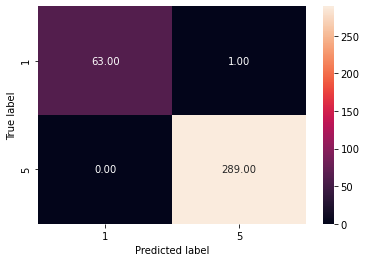

In [140]:
sns.heatmap(cm4, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

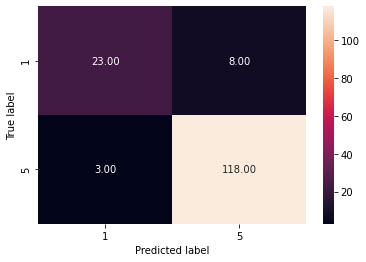

In [139]:
sns.heatmap(cm5, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Accuracy of all the models

In [148]:
print('Training Logistic regression' ,metrics.accuracy_score(train_predictions.actual,train_predictions.predicted))
print('Testing Logistic regression' ,metrics.accuracy_score(test_predictions.actual,test_predictions.predicted))
print('Training Naive Bayes' ,metrics.accuracy_score(train_predictions_naive_bayes.actual,train_predictions_naive_bayes.predicted))
print('Testing Naive Bayes' ,metrics.accuracy_score(test_predictions_naive_bayes.actual,test_predictions_naive_bayes.predicted))
print('Training Ada Boosting' ,metrics.accuracy_score(train_predictions_AdaBoosting.actual,train_predictions_AdaBoosting.predicted))
print('Testing Ada Boosting' ,metrics.accuracy_score(test_predictions_AdaBoosting.actual,test_predictions_AdaBoosting.predicted))

Training Logistic regression 0.8810198300283286
Testing Logistic regression 0.8486842105263158
Training Naive Bayes 0.9065155807365439
Testing Naive Bayes 0.8881578947368421
Training Ada Boosting 0.9971671388101983
Testing Ada Boosting 0.9276315789473685


### Ada Boosting was performing best in our case